In [13]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import glob 
import matplotlib.dates as mdates
import seaborn as sns
from scipy.stats import pearsonr

In [5]:
df_bitcoin=pd.read_csv(r"C:\Users\Usuario\Documents\Proyecto EDA\src\data\coin_Bitcoin.csv") 
df_XRP=pd.read_csv(r"C:\Users\Usuario\Documents\Proyecto EDA\src\data\coin_XRP.csv")

In [15]:
df_XRP.head()

,level_0,index,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,0,0,1,XRP,XRP,2013-08-05 23:59:59,0.005980,0.005613,0.005875,0.005613,0.0,4.387916e+07
1,1,1,2,XRP,XRP,2013-08-06 23:59:59,0.005661,0.004629,0.005637,0.004680,0.0,3.659101e+07
2,2,2,3,XRP,XRP,2013-08-07 23:59:59,0.004682,0.004333,0.004669,0.004417,0.0,3.453412e+07
3,3,3,4,XRP,XRP,2013-08-08 23:59:59,0.004424,0.004175,0.004397,0.004254,0.0,3.325863e+07
4,4,4,5,XRP,XRP,2013-08-09 23:59:59,0.004367,0.004253,0.004257,0.004291,0.0,3.354750e+07


In [14]:
df = df_XRP.drop(columns=['level_0'])

In [16]:
df_XRP.head()

,level_0,index,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,0,0,1,XRP,XRP,2013-08-05 23:59:59,0.005980,0.005613,0.005875,0.005613,0.0,4.387916e+07
1,1,1,2,XRP,XRP,2013-08-06 23:59:59,0.005661,0.004629,0.005637,0.004680,0.0,3.659101e+07
2,2,2,3,XRP,XRP,2013-08-07 23:59:59,0.004682,0.004333,0.004669,0.004417,0.0,3.453412e+07
3,3,3,4,XRP,XRP,2013-08-08 23:59:59,0.004424,0.004175,0.004397,0.004254,0.0,3.325863e+07
4,4,4,5,XRP,XRP,2013-08-09 23:59:59,0.004367,0.004253,0.004257,0.004291,0.0,3.354750e+07


In [17]:
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'])
df_XRP['Date'] = pd.to_datetime(df_XRP['Date'])

df_merged = pd.merge(df_bitcoin, df_XRP, on='Date', suffixes=('_btc', '_xrp'))
btc_precio = df_merged['High_btc']
xrp_precio = df_merged['High_xrp']

corr, _ = pearsonr(btc_precio, xrp_precio)
print(f"Coeficiente  entre BTC y ETH: {corr}")

Coeficiente  entre BTC y ETH: 0.6165177518213837


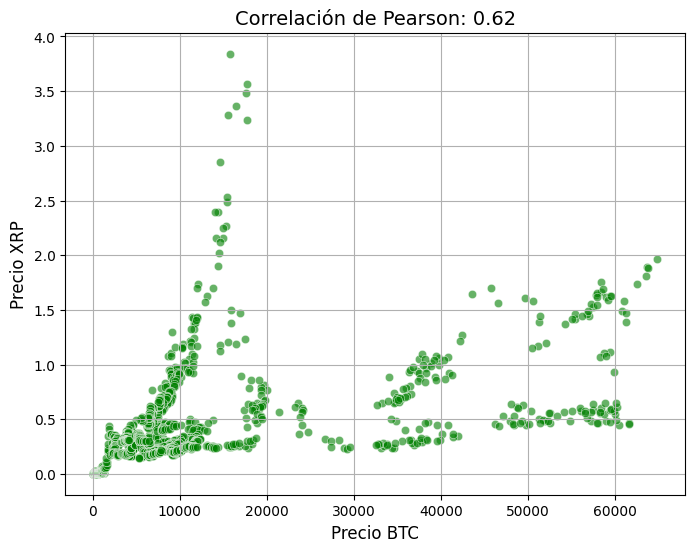

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=btc_precio, y=xrp_precio, color='green', alpha=0.6)
plt.title(f'Correlación de Pearson: {corr:.2f}', fontsize=14)
plt.xlabel('Precio BTC', fontsize=12)
plt.ylabel('Precio XRP', fontsize=12)
plt.grid(True)
plt.show()

In [19]:
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'])
df_XRP['Date'] = pd.to_datetime(df_XRP['Date'])
df_merged = pd.merge(df_bitcoin, df_XRP, on='Date', suffixes=('_btc', '_xrp'))
df_merged['btc_change'] = df_merged['Close_btc'].diff()
df_merged['xrp_change'] = df_merged['Close_xrp'].diff()

btc_up_dates = df_merged[df_merged['btc_change'] > 0]['Date']
xrp_up_dates = df_merged[df_merged['xrp_change'] > 0]['Date']

time_diffs = []
for btc_date in btc_up_dates:
    nearest_xrp_date = xrp_up_dates.iloc[(xrp_up_dates - btc_date).abs().argmin()]
    time_diff = abs((nearest_xrp_date - btc_date).days)
    time_diffs.append({'BTC Date': btc_date, 'XRP Date': nearest_xrp_date, 'Tiempo de diferencia (dias)': time_diff})

time_diffs_df = pd.DataFrame(time_diffs)
print(time_diffs_df)

                BTC Date            XRP Date  Tiempo de diferencia (dias)
0    2013-08-06 23:59:59 2013-08-09 23:59:59                            3
1    2013-08-10 23:59:59 2013-08-10 23:59:59                            0
2    2013-08-11 23:59:59 2013-08-11 23:59:59                            0
3    2013-08-12 23:59:59 2013-08-12 23:59:59                            0
4    2013-08-13 23:59:59 2013-08-12 23:59:59                            1
...                  ...                 ...                          ...
1557 2021-06-29 23:59:59 2021-06-29 23:59:59                            0
1558 2021-07-02 23:59:59 2021-07-03 23:59:59                            1
1559 2021-07-03 23:59:59 2021-07-03 23:59:59                            0
1560 2021-07-04 23:59:59 2021-07-04 23:59:59                            0
1561 2021-07-06 23:59:59 2021-07-06 23:59:59                            0

[1562 rows x 3 columns]
